# Project 7 YOLO

## Load Data and Model

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nwWZcKThSq9DXUZJnYXT")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
version = project.version(1)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov8:: 100%|██████████| 3468/3468 [00:00<00:00, 10174.77it/s]


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.9/756.9 kB 5.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## Trainig and Validation

In [ ]:
!yolo \
    task=detect \
    mode=train \
    data=/content/American-Sign-Language-Letters-1/data.yaml \
    model=yolov8s \
    epochs=20 \
    imgsz=400 \
    project=/content/American-Sign-Language-Letters-1 \
    name=training \
    val= True

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s, data=/content/American-Sign-Language-Letters-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/American-Sign-Language-Letters-1, name=training2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

## Testing

In [ ]:
!yolo \
    task=detect \
    mode=predict \
    model=/content/American-Sign-Language-Letters-1/training2/weights/best.pt \
    conf=0.25 \
    source=/content/American-Sign-Language-Letters-1/test/images

Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11135646 parameters, 0 gradients, 28.5 GFLOPs

image 1/72 /content/American-Sign-Language-Letters-1/test/images/A22_jpg.rf.f02ad8558ce1c88213b4f83c0bc66bc8.jpg: 416x416 1 A, 10.2ms
image 2/72 /content/American-Sign-Language-Letters-1/test/images/B14_jpg.rf.ed5ba6d44f55ab03e62d2baeac4aa1aa.jpg: 416x416 1 B, 10.3ms
image 3/72 /content/American-Sign-Language-Letters-1/test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg: 416x416 1 B, 10.2ms
image 4/72 /content/American-Sign-Language-Letters-1/test/images/B19_jpg.rf.69527cc1f34d694cc04e55db80ed9b1a.jpg: 416x416 1 B, 10.2ms
image 5/72 /content/American-Sign-Language-Letters-1/test/images/C17_jpg.rf.ceb81f8ae3c3673bd060ebe71848eca8.jpg: 416x416 1 C, 10.2ms
image 6/72 /content/American-Sign-Language-Letters-1/test/images/C19_jpg.rf.577ce02a223c65e89dc4a4eacd130040.jpg: 416x416 1 C, 10.2ms
image 7/72 /content/America

## Real time

<IPython.core.display.Javascript object>


0: 320x416 1 Y, 9.1ms
Speed: 1.2ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 320, 416)


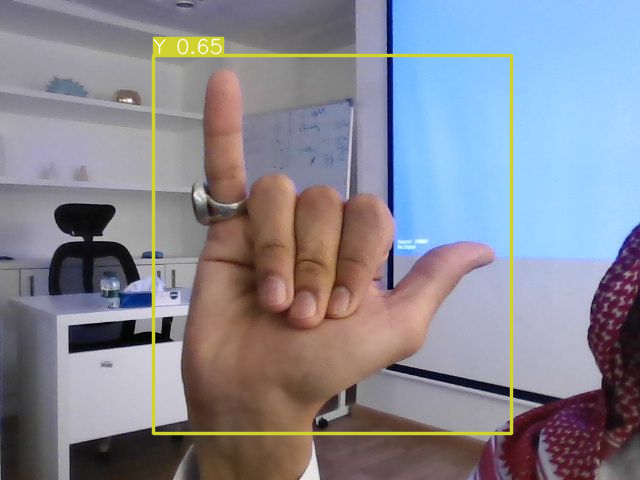

In [ ]:
import cv2
import numpy as np
import base64
from google.colab.output import eval_js
from IPython.display import display, Javascript
from google.colab.patches import cv2_imshow
from ultralytics import YOLO

# Function to capture image from webcam
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture Photo';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});
        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await new Promise((resolve) => (video.onloadedmetadata = resolve));
        video.play();

        // Resize the output to fit the screen
        video.style.width = '80%';
        video.style.height = 'auto';

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Capture image from webcam
photo_filename = take_photo()

# Load the captured image
image = cv2.imread(photo_filename)

# Load YOLOv8 model (replace 'yolov8s.pt' with the path to your trained model)
model = YOLO('/content/American-Sign-Language-Letters-1/training2/weights/best.pt')  # Change to your custom model path if needed

# Perform detection
results = model(image)

# Annotate the image with bounding boxes
annotated_image = results[0].plot()

# Display the annotated image
cv2_imshow(annotated_image)